In [59]:
import sqlite3
import os
import numpy as np
import matplotlib.pyplot as plt
import json
results = "../results/"

In [65]:
input_name = "left_out_varied_location_mnist"
model_name = "resnet_pretrained"

In [66]:
output_name = "keep_pct_readout_dump"
experiment_name = "keep_pct_readout_default"

conn = sqlite3.connect('../results/results_lookup.db')
c = conn.cursor()
timestamps = []
for row in c.execute('''
    SELECT * FROM experiments 
        WHERE input=?
            AND output=?
            AND model=?
            AND experiment=?
''', (input_name, output_name, model_name, experiment_name)):
    print(row)
    timestamps.append(row[0])

('2019-09-15_06:47:41_659173', 'left_out_varied_location_mnist', 'keep_pct_readout_dump', 'resnet_pretrained', 'keep_pct_readout_default')
('2019-09-15_07:00:05_113787', 'left_out_varied_location_mnist', 'keep_pct_readout_dump', 'resnet_pretrained', 'keep_pct_readout_default')
('2019-09-15_06:58:00_619343', 'left_out_varied_location_mnist', 'keep_pct_readout_dump', 'resnet_pretrained', 'keep_pct_readout_default')
('2019-09-15_07:02:08_757249', 'left_out_varied_location_mnist', 'keep_pct_readout_dump', 'resnet_pretrained', 'keep_pct_readout_default')
('2019-09-15_07:06:15_724010', 'left_out_varied_location_mnist', 'keep_pct_readout_dump', 'resnet_pretrained', 'keep_pct_readout_default')
('2019-09-15_07:04:13_545563', 'left_out_varied_location_mnist', 'keep_pct_readout_dump', 'resnet_pretrained', 'keep_pct_readout_default')
('2019-09-15_07:08:20_768421', 'left_out_varied_location_mnist', 'keep_pct_readout_dump', 'resnet_pretrained', 'keep_pct_readout_default')
('2019-09-15_07:10:23_44951

In [67]:
train_results, test_results = [], []
for trial_timestamp in timestamps:    
    with open(results + trial_timestamp + "/train.json") as train_fp:
        train_results.append(json.load(train_fp))
    with open(results + trial_timestamp + "/test.json") as test_fp:
        test_results.append(json.load(test_fp))
keep_pcts = sorted(list(test_results[0].keys()))[::-1]
label_1_name = test_results[0][keep_pcts[0]][0]["class_1_name"].capitalize()
label_2_name = test_results[0][keep_pcts[0]][0]["class_2_name"].capitalize()

In [68]:
left_out_final_num_accs_raw = np.array([[trial_test_results[keep_pct][-1]["left_out_num_acc"] for keep_pct in keep_pcts] for trial_test_results in test_results])
left_out_final_num_accs = np.mean(left_out_final_num_accs_raw, axis=0)
left_out_final_num_accs_std = np.std(left_out_final_num_accs_raw, axis=0)
left_out_final_col_accs_raw = np.array([[trial_test_results[keep_pct][-1]["left_out_col_acc"] for keep_pct in keep_pcts] for trial_test_results in test_results])
left_out_final_col_accs = np.mean(left_out_final_col_accs_raw, axis=0)
left_out_final_col_accs_std = np.std(left_out_final_col_accs_raw, axis=0)
non_left_out_final_num_accs_raw = np.array([[trial_test_results[keep_pct][-1]["non_left_out_num_acc"] for keep_pct in keep_pcts] for trial_test_results in test_results])
non_left_out_final_num_accs = np.mean(non_left_out_final_num_accs_raw, axis=0)
non_left_out_final_num_accs_std = np.std(non_left_out_final_num_accs_raw, axis=0)
non_left_out_final_col_accs_raw = np.array([[trial_test_results[keep_pct][-1]["non_left_out_col_acc"] for keep_pct in keep_pcts] for trial_test_results in test_results])
non_left_out_final_col_accs = np.mean(non_left_out_final_col_accs_raw, axis=0)
non_left_out_final_col_accs_std = np.std(non_left_out_final_col_accs_raw, axis=0)
print(non_left_out_final_col_accs)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


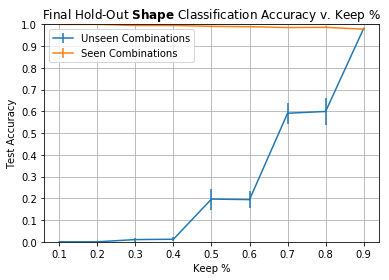

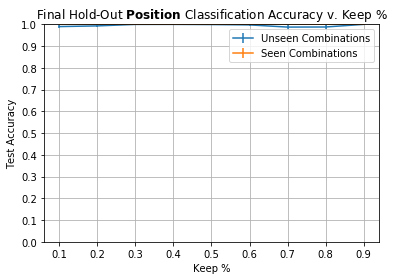

In [69]:
directory = "../plots/{}/{}/{}/{}/".format(experiment_name, output_name, input_name, model_name) 

if not os.path.exists(directory):
    os.makedirs(directory)

plt.figure(4)
plt.errorbar(keep_pcts[:0:-1], left_out_final_num_accs[:0:-1], yerr=left_out_final_num_accs_std[:0:-1])
plt.errorbar(keep_pcts[:0:-1], non_left_out_final_num_accs[:0:-1], yerr=non_left_out_final_num_accs_std[:0:-1])
plt.ylim(0, 1)
plt.xlabel('Keep %')
plt.ylabel('Test Accuracy')
plt.title(r'Final Hold-Out $\bf {}$ Classification Accuracy v. Keep %'.format(label_1_name))
plt.legend(["Unseen Combinations", "Seen Combinations"], loc='best')
plt.grid(True)
plt.yticks([x / 10. for x in range(0, 11)])
plt.savefig(directory + "hold_out_{}_acc.pdf".format(label_1_name.lower()))

plt.figure(5)
plt.errorbar(keep_pcts[:0:-1], left_out_final_col_accs[:0:-1], yerr=left_out_final_col_accs_std[:0:-1])
plt.errorbar(keep_pcts[:0:-1], non_left_out_final_col_accs[:0:-1], yerr=non_left_out_final_col_accs_std[:0:-1])
plt.ylim(0, 1)
plt.xlabel('Keep %')
plt.ylabel('Test Accuracy')
plt.title(r"Final Hold-Out $\bf {}$ Classification Accuracy v. Keep %".format(label_2_name))
plt.legend(["Unseen Combinations", "Seen Combinations"], loc='best')
plt.grid(True)
plt.yticks([x / 10 for x in range(0, 11)])
plt.savefig(directory + "hold_out_{}_acc.pdf".format(label_2_name.lower()))
plt.show()